In [1]:
from read_data import *
from changepoint_detection import *
from eigen_freq import *

In [2]:
data = process_data()

In [3]:
for dataset in data:
    if dataset != "V2_00001-1":
        print(dataset, data[dataset]["hdr"].comment)

V2_00001 ['vc=120', 'f=0.185']
V10_0001 ['Schneiden', 'v_c=111 m/min', 'f=0.231 mm', 'V_oel=229 l/min']
D0400001 ['vc=111m/min', 'f=0.231mm', 'Dämpfer 1240 mm von Einspannung', 'DiffDruck: 12 bar']
D0600001 ['vc=120m/min', 'f=0.185mm', 'Dämpfer 1240 mm von Einspannung', 'DiffDruck: 12 bar']
D0800001 ['vc=90m/min', 'f=0.250mm', 'Dämpfer 1240 mm von Einspannung', 'DiffDruck: 12 bar']
V6_00001 ['Schneiden', 'v_c=111 m/min', 'f=0.231 mm', 'V_oel=371 l/min']
V17_0001 ['Schneiden', 'v_c=120 m/min', 'f=0.185 mm', 'V_oel=300 l/min']
V20_0001 ['Schneiden', 'v_c=90 m/min', 'f=0.250 mm', 'V_oel=300 l/min']
V24_0001 ['Schneiden', 'v_c=120 m/min', 'f=0.185 mm', 'V_oel=300 l/min']
V25a_001 ['Schneiden', 'v_c=120 m/min', 'f=0.185 mm', 'V_oel=300 l/min']


In [4]:
selected_sensors = ["CH1_Moment", "CH2_Kraft"]
changepoints = generate_changepoints(data, selected_sensors)

c:\Users\Raafe\AppData\Local\Programs\Python\Python38\lib\site-packages\ruptures\costs\costnormal.py:27: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  warnings.warn(


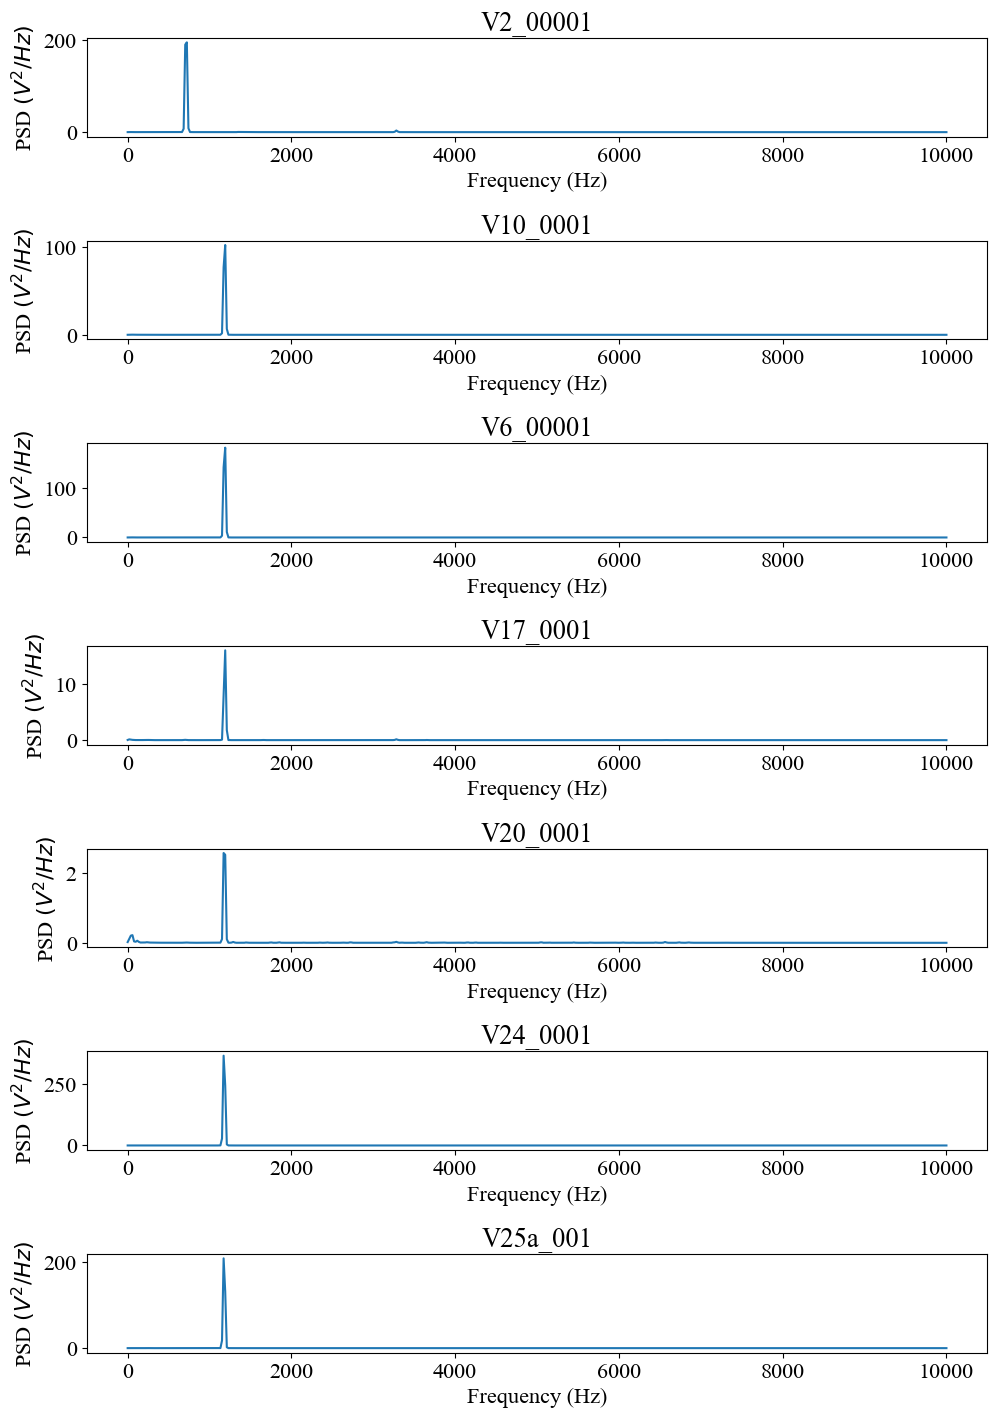

V2_00001
{'top_freq': array([3281.25   ,  722.65625]),
 'top_psds': array([  3.54566376, 195.46272504])}
V10_0001
{'top_freq': array([1191.40625]), 'top_psds': array([102.2297846])}
V6_00001
{'top_freq': array([1191.40625]), 'top_psds': array([181.59785107])}
V17_0001
{'top_freq': array([1191.40625]), 'top_psds': array([15.86486352])}
V20_0001
{'top_freq': array([1171.875]), 'top_psds': array([2.57830382])}
V24_0001
{'top_freq': array([1171.875]), 'top_psds': array([365.21529246])}
V25a_001
{'top_freq': array([1171.875]), 'top_psds': array([209.27201783])}


In [9]:
selected_datasets = {
 'V2_00001':3,
 'V10_0001':3,
 'V6_00001':3,
 'V17_0001':3,
 'V20_0001':3,
 'V24_0001':3,
 'V25a_001':3
}

sensor = "CH1_Moment"

eigen_freqs = generate_eigen_freqs(data, changepoints, sensor, selected_datasets, 2)
plot_eigen_freq(list(selected_datasets.keys()), eigen_freqs, sensor, (10,14), "V_datasets_eig_freq_" + sensor + ".pdf")

print_freq_infos(eigen_freqs, dataset, sensor)

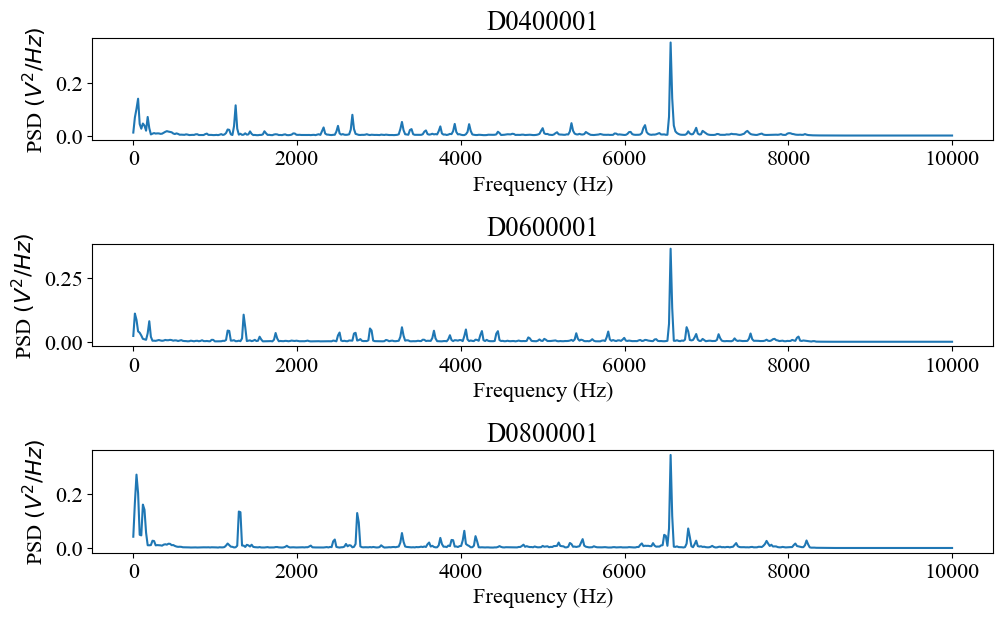

D0400001
{'top_freq': array([6562.5]), 'top_psds': array([0.35361143])}
D0600001
{'top_freq': array([6562.5]), 'top_psds': array([0.36579765])}
D0800001
{'top_freq': array([6562.5   ,   39.0625]),
 'top_psds': array([0.34532465, 0.27223822])}


In [10]:
sensor = "CH1_Moment"

similar_datasets = ['V6_00001', 'V17_0001', 'V20_0001']
d_datasets = ['D0400001', 'D0600001', 'D0800001']
cgpt_indices = {}
for i in range(len(d_datasets)):
    cgpt_indices[d_datasets[i]] = changepoints[similar_datasets[i]][sensor]["indexes"] 
similar_datasets_cpts = {
 'D0400001':3,
 'D0600001':3,
 'D0800001':3
}

eigen_freqs = generate_eigen_freqs(data, cgpt_indices, sensor, similar_datasets_cpts, 0.2)
plot_eigen_freq(d_datasets, eigen_freqs, sensor, (10,6), "D_datasets_eig_freq_" + sensor + ".pdf")
print_freq_infos(eigen_freqs, dataset, sensor)

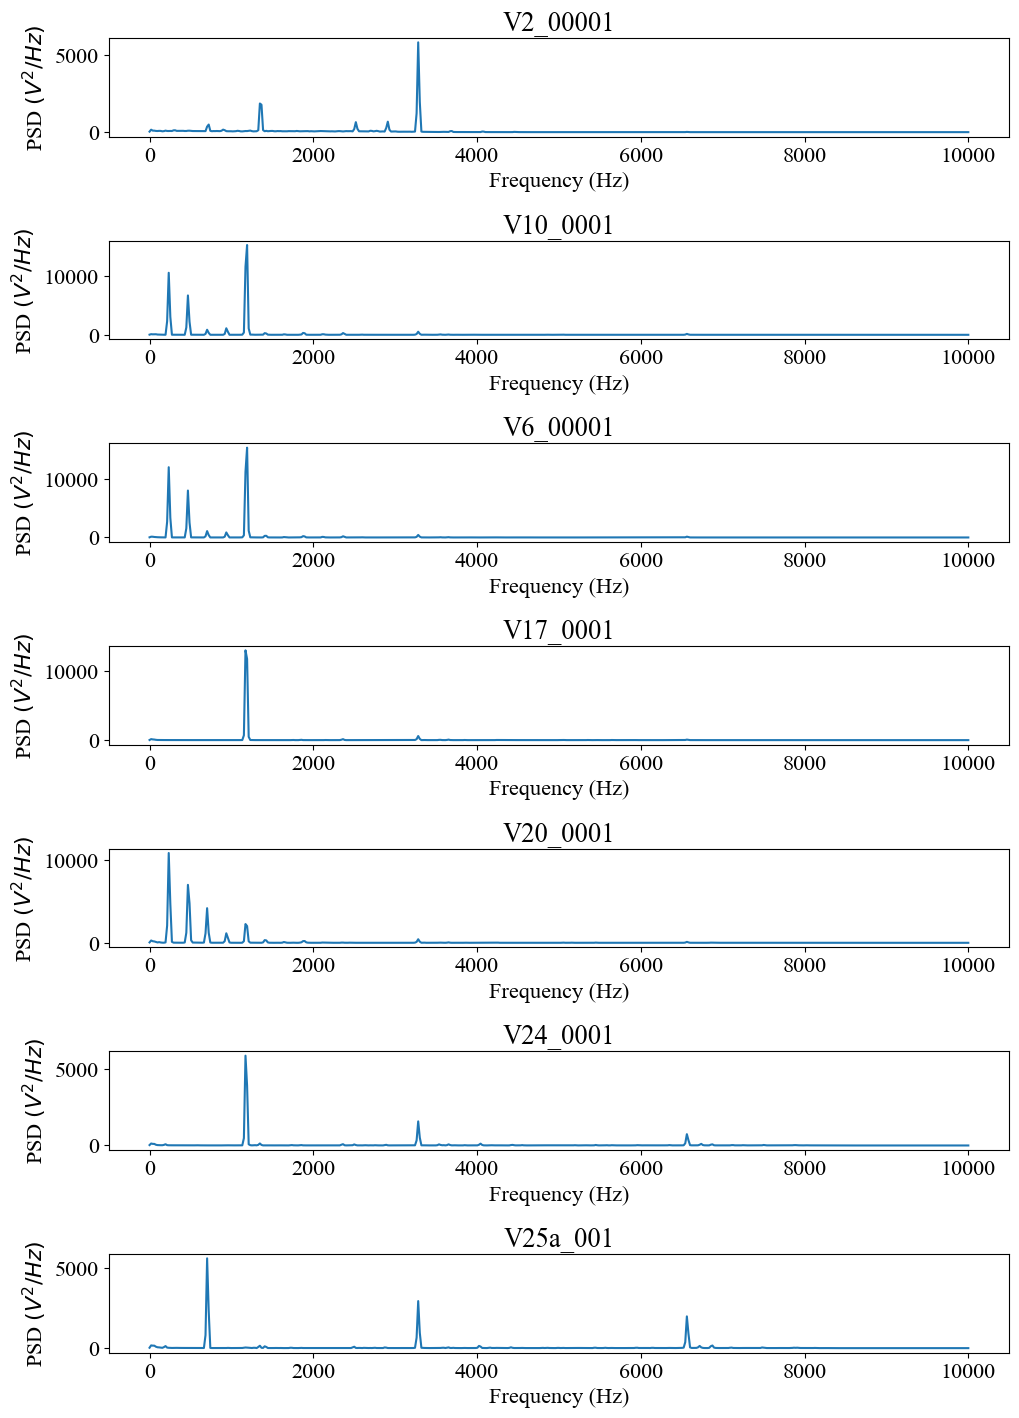

V2_00001
{'top_freq': array([3281.25]), 'top_psds': array([5813.45166191])}
V10_0001
{'top_freq': array([1191.40625,  468.75   ,  234.375  ]),
 'top_psds': array([15346.56605122,  6727.63582089, 10600.94272098])}
V6_00001
{'top_freq': array([1191.40625,  468.75   ,  234.375  ]),
 'top_psds': array([15378.13387799,  8037.77254497, 12031.11493186])}
V17_0001
{'top_freq': array([1171.875]), 'top_psds': array([12924.62602666])}
V20_0001
{'top_freq': array([468.75 , 234.375]),
 'top_psds': array([ 7002.29985537, 10848.63957717])}
V24_0001
{'top_freq': array([1171.875]), 'top_psds': array([5864.1269825])}
V25a_001
{'top_freq': array([703.125]), 'top_psds': array([5594.24601724])}


In [11]:
selected_datasets = {
 'V2_00001':2,
 'V10_0001':4,
 'V6_00001':4,
 'V17_0001':3,
 'V20_0001':4,
 'V24_0001':3,
 'V25a_001':3
}

sensor = "CH2_Kraft"

eigen_freqs = generate_eigen_freqs(data, changepoints, sensor, selected_datasets, 5000)
plot_eigen_freq(list(selected_datasets.keys()), eigen_freqs, sensor, (10,14), "V_datasets_eig_freq_" + sensor + ".pdf")

print_freq_infos(eigen_freqs, dataset, sensor)

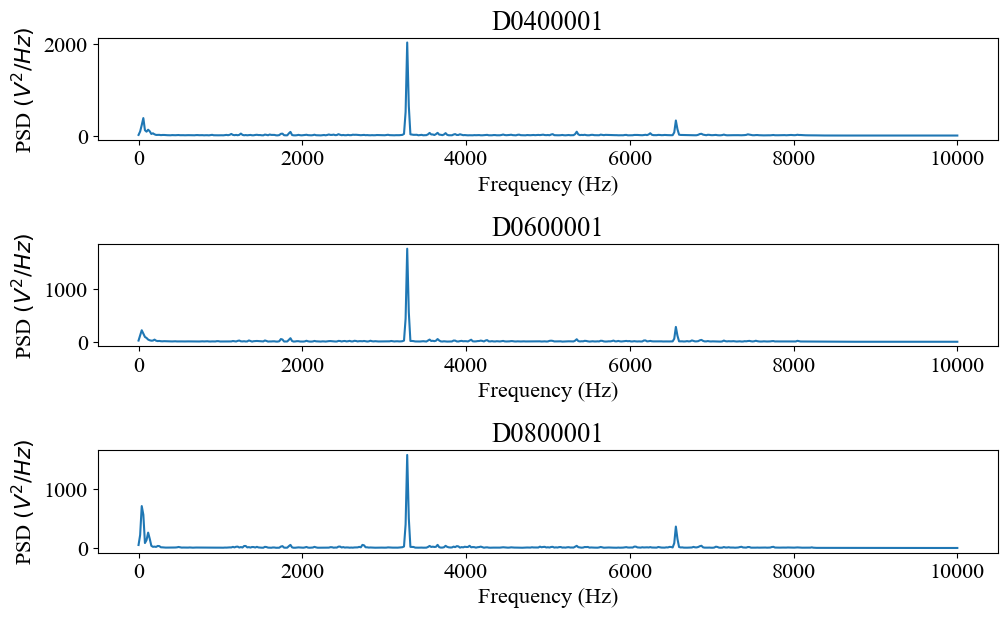

D0400001
{'top_freq': array([6562.5    , 3281.25   ,   58.59375]),
 'top_psds': array([ 327.32526955, 2025.6713588 ,  380.38622428])}
D0600001
{'top_freq': array([6562.5 , 3281.25]),
 'top_psds': array([ 280.27797095, 1758.20570867])}
D0800001
{'top_freq': array([6562.5   , 3281.25  ,  117.1875,   39.0625]),
 'top_psds': array([ 362.12862965, 1573.26105253,  259.88264076,  708.51283175])}


In [12]:
sensor = "CH2_Kraft"

similar_datasets = ['V6_00001', 'V17_0001', 'V20_0001']
d_datasets = ['D0400001', 'D0600001', 'D0800001']
cgpt_indices = {}
for i in range(len(d_datasets)):
    cgpt_indices[d_datasets[i]] = changepoints[similar_datasets[i]][sensor]["indexes"] 
similar_datasets_cpts = {
 'D0400001':3,
 'D0600001':3,
 'D0800001':3
}

eigen_freqs = generate_eigen_freqs(data, cgpt_indices, sensor, similar_datasets_cpts, 250)
plot_eigen_freq(d_datasets, eigen_freqs, sensor, (10,6), "D_datasets_eig_freq_" + sensor + ".pdf")
print_freq_infos(eigen_freqs, dataset, sensor)